In [3]:
import pandas as pd
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(filepath, header=None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       238 non-null    float64
 1   1       239 non-null    object 
 2   2       239 non-null    object 
 3   3       239 non-null    object 
 4   4       239 non-null    object 
 5   5       239 non-null    object 
 6   6       239 non-null    object 
 7   7       235 non-null    object 
 8   8       239 non-null    object 
 9   9       239 non-null    object 
 10  10      239 non-null    object 
 11  11      234 non-null    object 
 12  12      239 non-null    object 
dtypes: float64(1), object(12)
memory usage: 24.4+ KB


In [5]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
1,0.0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
2,1.0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
3,2.0,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
4,3.0,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244


In [6]:
df.tail(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
234,233.0,Lenovo,4,IPS Panel,2,1,7,35.56,2.6,8,256,1.7,1891
235,234.0,Toshiba,3,Full HD,2,1,5,33.782,2.4,8,256,1.2,1950
236,235.0,Lenovo,4,IPS Panel,2,1,5,30.48,2.6,8,256,1.36,2236
237,236.0,Lenovo,3,Full HD,3,1,5,39.624,2.5,6,256,2.4,883
238,237.0,Toshiba,3,Full HD,2,1,5,35.56,2.3,8,256,1.95,1499


In [7]:
df.columns=["NaN"	,"Manufacturer",	"Category",	"Screen",	"GPU",	"OS",	"CPU_core",	"Screen_Size_cm",	"CPU_frequency",	"RAM_GB",	"Storage_GB_SSD",	"Weight_kg",	"Price"]
df
df['Screen_Size_cm'] = pd.to_numeric(df['Screen_Size_cm'], errors='coerce')
df['Screen_Size_cm'] = df['Screen_Size_cm'].round(2)
df


,NaN,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,NaN,Manufacturer,Category,Screen,GPU,OS,CPU_core,NaN,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
1,0.0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
2,1.0,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.2,634
3,2.0,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.2,946
4,3.0,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,233.0,Lenovo,4,IPS Panel,2,1,7,35.56,2.6,8,256,1.7,1891
235,234.0,Toshiba,3,Full HD,2,1,5,33.78,2.4,8,256,1.2,1950
236,235.0,Lenovo,4,IPS Panel,2,1,5,30.48,2.6,8,256,1.36,2236
237,236.0,Lenovo,3,Full HD,3,1,5,39.62,2.5,6,256,2.4,883


In [8]:
## evaluate the dataset for missing data

In [9]:
missing_data=df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

     NaN  Manufacturer  Category  Screen    GPU     OS  CPU_core  \
0   True         False     False   False  False  False     False   
1  False         False     False   False  False  False     False   
2  False         False     False   False  False  False     False   
3  False         False     False   False  False  False     False   
4  False         False     False   False  False  False     False   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0            True          False   False           False      False  False  
1           False          False   False           False      False  False  
2           False          False   False           False      False  False  
3           False          False   False           False      False  False  
4           False          False   False           False      False  False  
NaN
NaN
False    238
True       1
Name: count, dtype: int64

Manufacturer
Manufacturer
False    239
Name: count, dtype: int64

Ca

In [11]:
## replace msiisng vlues with mean

In [12]:
df['Weight_kg'] = pd.to_numeric(df['Weight_kg'], errors='coerce')

avg_weight = df['Weight_kg'].mean()

df['Weight_kg'].fillna(avg_weight, inplace=True)


/tmp/ipython-input-2511150846.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight_kg'].fillna(avg_weight, inplace=True)


In [13]:
## replace missign values with most freequent values

In [16]:
import numpy as np
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df["Screen_Size_cm"] = df["Screen_Size_cm"].replace(np.nan, common_screen_size)

In [18]:
## Fixing   the data types

In [19]:
df[["Weight_kg","Screen_Size_cm"]] = df[["Weight_kg","Screen_Size_cm"]].astype("float")

In [20]:
## data standardization

In [21]:
df["Weight_kg"] = df["Weight_kg"]*2.205
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

# Data standardization: convert screen size from cm to inch
df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)

In [22]:
##  data normalization

In [23]:
df['CPU_frequency'] = pd.to_numeric(df['CPU_frequency'], errors='coerce')


In [24]:
## binnign

In [25]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'].fillna(df['Price'].mean(), inplace=True)
bins = np.linspace(df['Price'].min(), df['Price'].max(), 4)
group_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins,
                            labels=group_names,
                            include_lowest=True)


/tmp/ipython-input-423838025.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(df['Price'].mean(), inplace=True)


In [26]:
## plot bar graph for bins

Text(0.5, 1.0, 'Price bins')

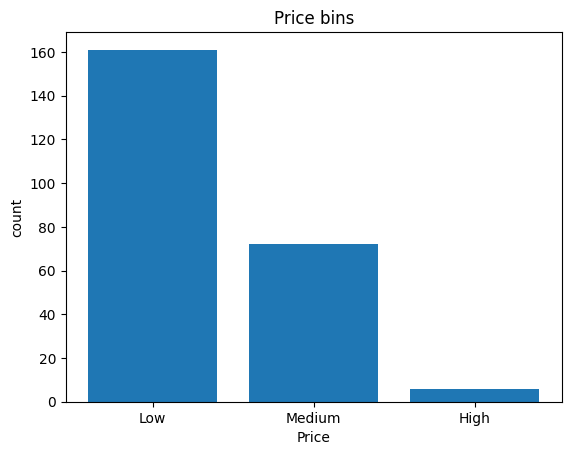

In [28]:
import matplotlib.pyplot as plt
plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

In [29]:
## indicator avriables

In [30]:
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(
    columns={'IPS Panel':'Screen-IPS_panel',
             'Full HD':'Screen-Full_HD'},
    inplace=True
)
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop("Screen", axis=1, inplace=True)
